# Creating a MultiClass Image Classifier

Tutorial Link: https://github.com/imamun93/animal-image-classifications/blob/master/final_notebook.ipynb 

#### 1. Data Acquisition

In [13]:
# spare cell to install necessary packages

%pip install keras_utils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for keras_utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2655 sha256=d5a4a6f9fc70414b9eb83528064134d57838b8a79765a38ba158f5f18e6cbdec
  Stored in directory: c:\users\mohana.selvakumar\appdata\local\pip\cache\wheels\04\e4\c5\8eda37877405e9629bdb31de4ae348a0a7386382d7c3eb5975
Successfully built keras_utils
Note: you may need to restart the kernel to use updated packages.


In [1]:
# import necessary libraries

import pandas as pd
import numpy as np 
import itertools
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras_preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense  
from keras import applications
from keras.utils import to_categorical
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import os
import skimage
from skimage import io, transform, color
import math  
import datetime
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [2]:
# load dataset

dataset_dir = r'C:\Users\mohana.selvakumar\Downloads\animal-classification\raw-img'

# list all subdirectories (each representing a different class)
classes = os.listdir(dataset_dir)
# print(classes)

# initialize lists to store images and labels
images = []
labels = []

image_shape = (128, 128, 3)

#### 2. Data Preprocessing

In [3]:
# data preprocessing

for class_name in classes:
    class_dir = os.path.join(dataset_dir, class_name)
    for filename in os.listdir(class_dir):
        # load the image using skimage
        image_path = os.path.join(class_dir, filename)
        image = io.imread(image_path)

        # # handle different image formats to turn to grayscale
        # if len(image.shape) == 2:  # grayscale image
        #     gray_image = image
        # elif image.shape[-1] == 4:  # RGBA image
        #     image = color.rgba2rgb(image)
        #     gray_image = color.rgb2gray(image)
        # elif image.shape[-1] == 3:  # RGB image
        #     gray_image = color.rgb2gray(image)
        # else:
        #     continue  # skip images that don't fit expected formats

        # resize the image
        image_resized = transform.resize(image, image_shape, anti_aliasing=True)

        # normalize pixel values
        image_normalized = (image_resized - np.min(image_resized)) / (np.max(image_resized) - np.min(image_resized))
        
        # add the preprocessed image to the list
        images.append(image_normalized)

        # add the corresponding label
        labels.append(class_name)

In [4]:
# convert lists to numpy arrays

images = np.array(images)
labels = np.array(labels)

In [5]:
# encode labels as integers

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# convert labels to categorical format
labels_categorical = to_categorical(labels_encoded)

In [6]:
# check

print("Shape of images array:", images.shape)
print("Shape of labels array:", labels_categorical.shape)


Shape of images array: (14772, 128, 128, 3)
Shape of labels array: (14772, 6)


In [7]:
# split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)

In [8]:
# check

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (11817, 128, 128, 3)
Shape of X_test: (2955, 128, 128, 3)
Shape of y_train: (11817, 6)
Shape of y_test: (2955, 6)


#### 3. Model Development

In [9]:
# building a Convoluional Neural Networks (CNN) model

model = Sequential()

# add convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

# add more convolutional layers
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# flatten the output and add a dense layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(len(classes), activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# print the model summary
model.summary()


c:\Users\mohana.selvakumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,414 (12.61 MB)

 Trainable params: 3,305,414 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# train the model

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 128s 392ms/step - accuracy: 0.3714 - loss: 1.5954 - val_accuracy: 0.5097 - val_loss: 1.2146
Epoch 2/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 114s 386ms/step - accuracy: 0.5322 - loss: 1.2168 - val_accuracy: 0.5647 - val_loss: 1.0907
Epoch 3/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 101s 341ms/step - accuracy: 0.6009 - loss: 1.0439 - val_accuracy: 0.6320 - val_loss: 0.9631
Epoch 4/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 117s 395ms/step - accuracy: 0.6497 - loss: 0.9438 - val_accuracy: 0.6629 - val_loss: 0.9279
Epoch 5/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 99s 334ms/step - accuracy: 0.7015 - loss: 0.8154 - val_accuracy: 0.6857 - val_loss: 0.8445
Epoch 6/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 110s 370ms/step - accuracy: 0.7322 - loss: 0.7345 - val_accuracy: 0.6878 - val_loss: 0.9430
Epoch 7/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 114s 384ms/step - accuracy: 0.7833 - loss: 0.6075 - val_accuracy: 0.7035 - val_loss: 0.9038
Epoch 8/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 104s 352ms/step - accuracy: 0.8100 - 

In [14]:
# after data augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Fit the data generator on the training data
datagen.fit(X_train)

# Use the data generator in model training
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
370/370 ━━━━━━━━━━━━━━━━━━━━ 198s 527ms/step - accuracy: 0.5779 - loss: 1.1221 - val_accuracy: 0.7086 - val_loss: 0.8060
Epoch 2/5
370/370 ━━━━━━━━━━━━━━━━━━━━ 176s 468ms/step - accuracy: 0.6168 - loss: 1.0446 - val_accuracy: 0.6873 - val_loss: 0.8770
Epoch 3/5
370/370 ━━━━━━━━━━━━━━━━━━━━ 159s 424ms/step - accuracy: 0.6277 - loss: 1.0039 - val_accuracy: 0.7046 - val_loss: 0.8135
Epoch 4/5
370/370 ━━━━━━━━━━━━━━━━━━━━ 166s 443ms/step - accuracy: 0.6366 - loss: 0.9795 - val_accuracy: 0.7465 - val_loss: 0.7181
Epoch 5/5
370/370 ━━━━━━━━━━━━━━━━━━━━ 166s 443ms/step - accuracy: 0.6572 - loss: 0.9435 - val_accuracy: 0.7685 - val_loss: 0.6919


In [15]:
# testing the model

test_loss, test_accuracy = model.evaluate(X_test, y_test)

93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.7736 - loss: 0.6774


#### 4. Model Evaluation

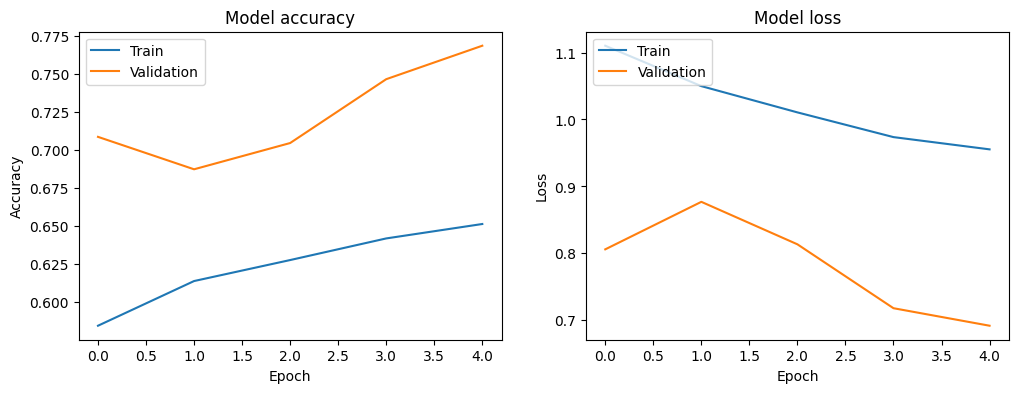

In [16]:
# Plot training & validation accuracy and loss values

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

#### 5. Prediction

In [31]:
# preprocessing of the image

def preprocess_image(img_path, target_size):
    
    # load, resize and normalise image (preprocessing steps taken when training the model)
    img = io.imread(img_path)
    img = transform.resize(img, target_size, anti_aliasing=True)
    img = (img - np.min(img)) / (np.max(img) - np.min(img))
    img = np.expand_dims(img, axis=0)

        
    return img

In [32]:
# load image

img_path = r"C:\Users\mohana.selvakumar\Downloads\download.jpg"
preprocessed_img = preprocess_image(img_path, target_size=(128, 128, 3))

In [33]:
# predict label of image

predictions = model.predict(preprocessed_img)

# convert prediction to class label
predicted_class = np.argmax(predictions, axis=1)

# list of class labels
class_labels = ['cane', 'cavallo', 'elefante', 'farfalla', 'mucca', 'scoiattolo']
predicted_label = class_labels[predicted_class[0]]


print(f"Predicted label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted label: farfalla
